In [1]:
import os

import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
DATA_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
INPUT_SIZE = 150
NUM_EPOCHS = 50

In [3]:
data_dir = keras.utils.get_file(
    os.path.basename(DATA_URL),
    DATA_URL,
    cache_dir='./',
    cache_subdir='',
    extract=True
)

train_dir = os.path.join(os.path.splitext(data_dir)[0], 'train')
val_dir = os.path.join(os.path.splitext(data_dir)[0], 'validation')

In [4]:
train_data = ImageDataGenerator(rescale=1.0/255)
train_generator = train_data.flow_from_directory(
    train_dir,
    target_size=(INPUT_SIZE, INPUT_SIZE),
    batch_size=32,
    class_mode='binary'
)

val_data = ImageDataGenerator(rescale=1.0/255)
val_generator = val_data.flow_from_directory(
    val_dir,
    target_size=(INPUT_SIZE, INPUT_SIZE),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
def build_model():
    model = keras.models.Sequential([
        keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Conv2D(128, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Conv2D(128, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Flatten(),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=keras.optimizers.RMSprop(lr=1e-4),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [6]:
def plot_history(history):
    epochs = range(len(history.history['accuracy']))
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='val_accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='loss')
    plt.plot(epochs, history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.show()

In [7]:
keras.backend.clear_session()

model = build_model()

In [8]:
history = model.fit(
    train_generator,
    epochs=NUM_EPOCHS,
    validation_data=val_generator,
    verbose=1
)

Epoch 1/50
63/63 [==============================] - 8s 135ms/step - loss: 0.6925 - accuracy: 0.5160 - val_loss: 0.6796 - val_accuracy: 0.6300
Epoch 2/50
63/63 [==============================] - 8s 131ms/step - loss: 0.6634 - accuracy: 0.6060 - val_loss: 0.6799 - val_accuracy: 0.5510
Epoch 3/50
63/63 [==============================] - 8s 129ms/step - loss: 0.6278 - accuracy: 0.6575 - val_loss: 0.6341 - val_accuracy: 0.6160
Epoch 4/50
63/63 [==============================] - 8s 129ms/step - loss: 0.5797 - accuracy: 0.7060 - val_loss: 0.7096 - val_accuracy: 0.5750
Epoch 5/50
63/63 [==============================] - 8s 128ms/step - loss: 0.5568 - accuracy: 0.7165 - val_loss: 0.5862 - val_accuracy: 0.6830
Epoch 6/50
63/63 [==============================] - 8s 128ms/step - loss: 0.5314 - accuracy: 0.7370 - val_loss: 0.5685 - val_accuracy: 0.7030
Epoch 7/50
63/63 [==============================] - 8s 128ms/step - loss: 0.5086 - accuracy: 0.7530 - val_loss: 0.5526 - val_accuracy: 0.7220
Epoch 

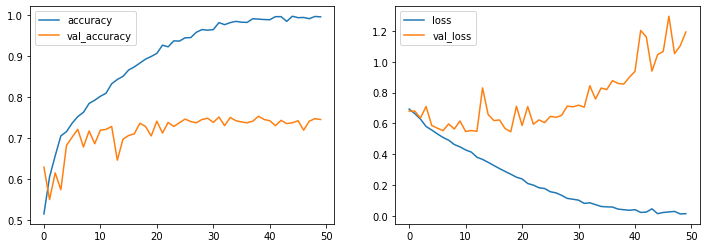

In [9]:
plot_history(history)

In [10]:
train_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_data.flow_from_directory(
    train_dir,
    target_size=(INPUT_SIZE, INPUT_SIZE),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [11]:
keras.backend.clear_session()

model = build_model()

In [12]:
history = model.fit(
    train_generator,
    epochs=NUM_EPOCHS,
    validation_data=val_generator,
    verbose=1
)

Epoch 1/50
63/63 [==============================] - 16s 262ms/step - loss: 0.6913 - accuracy: 0.5155 - val_loss: 0.6836 - val_accuracy: 0.5490
Epoch 2/50
63/63 [==============================] - 16s 260ms/step - loss: 0.6797 - accuracy: 0.5655 - val_loss: 0.7278 - val_accuracy: 0.5040
Epoch 3/50
63/63 [==============================] - 16s 258ms/step - loss: 0.6666 - accuracy: 0.5865 - val_loss: 0.6990 - val_accuracy: 0.5240
Epoch 4/50
63/63 [==============================] - 16s 259ms/step - loss: 0.6516 - accuracy: 0.6115 - val_loss: 0.6059 - val_accuracy: 0.6720
Epoch 5/50
63/63 [==============================] - 16s 259ms/step - loss: 0.6291 - accuracy: 0.6470 - val_loss: 0.5913 - val_accuracy: 0.6720
Epoch 6/50
63/63 [==============================] - 16s 261ms/step - loss: 0.6228 - accuracy: 0.6505 - val_loss: 0.5686 - val_accuracy: 0.7090
Epoch 7/50
63/63 [==============================] - 16s 258ms/step - loss: 0.5999 - accuracy: 0.6650 - val_loss: 0.5745 - val_accuracy: 0.6900

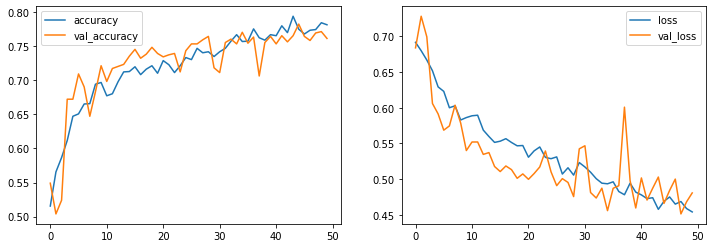

In [13]:
plot_history(history)